In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_rows", None)
print("setup")

setup


In [ ]:
path = "/content/train.csv"

def load_data(file_path):
  df = pd.read_csv(file_path)
  df = df.drop(axis=1, columns=["Cabin", "Ticket", "PassengerId", "Name"])
  return df

data_frame = load_data(path)
data_frame.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [ ]:
data_frame.isnull().value_counts()
data_frame.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [ ]:
mean_value = data_frame["Age"].mean()
mean_value

data_frame["Age"].fillna(value=mean_value, inplace=True)

data_frame.dropna(axis=0, inplace=True)

In [ ]:
for column in data_frame.columns:
  unique = data_frame[column].unique()
  print(f"{len(unique)} : {column} > {unique}")
  print()


3 : Pclass > [3 2 1]

2 : Sex > ['male' 'female']

79 : Age > [34.5        47.         62.         27.         22.         14.
 30.         26.         18.         21.         30.27259036 46.
 23.         63.         24.         35.         45.         55.
  9.         48.         50.         22.5        41.         33.
 18.5        25.         39.         60.         36.         20.
 28.         10.         17.         32.         13.         31.
 29.         28.5        32.5         6.         67.         49.
  2.         76.         43.         16.          1.         12.
 42.         53.         26.5        40.         61.          7.
 15.         54.         64.         37.         34.         11.5
  8.          0.33       38.         57.         40.5         0.92
 19.         36.5         0.75        0.83       58.          0.17
 59.         14.5        44.          5.         51.          3.
 38.5       ]

7 : SibSp > [0 1 2 3 4 5 8]

8 : Parch > [0 1 3 2 4 6 5 9]

169 : Fare > 

<Axes: >

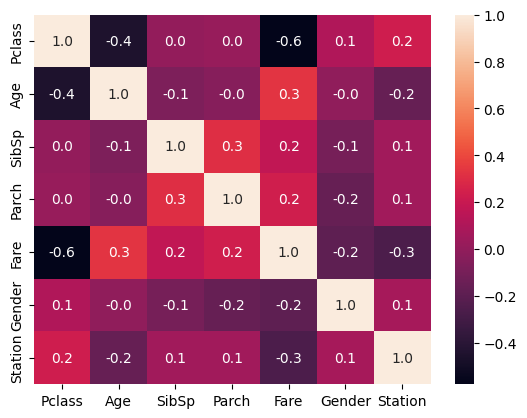

In [ ]:
data_frame.head()

df = data_frame.drop(axis=1, columns=["Sex", "Embarked"])
corr = df.corr()

sns.heatmap(corr, annot=True, fmt=".1f")

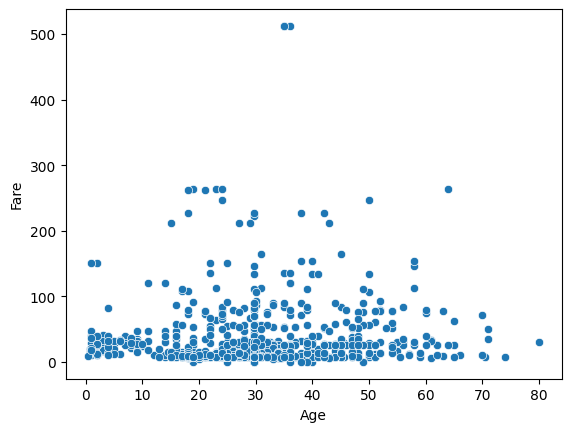

In [ ]:

#sns.displot(data=data_frame, x="Age", y="Fare", kind="kde")
sns.scatterplot(data=data_frame, x="Age", y="Fare")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 76.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 62.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 87.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 79.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


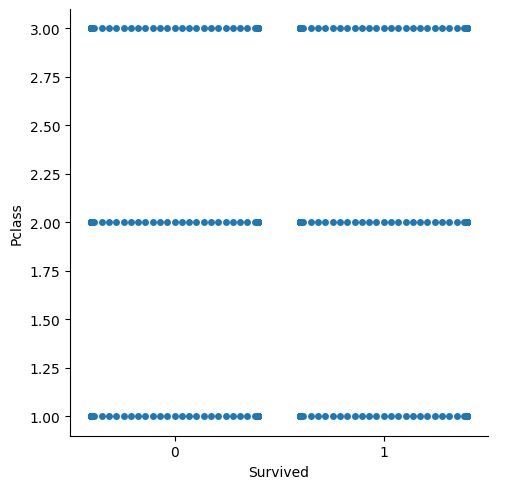

In [ ]:
sns.catplot(data=data_frame, x="Survived", y="Pclass", kind="swarm")  # the pClass did not directly determine the survival
plt.show()

In [ ]:
#removing the Pclas
data_frame = data_frame.drop("Pclass", axis=1)
data_frame.head()

,Sex,Age,SibSp,Parch,Fare,Embarked
0,male,34.5,0,0,7.8292,Q
1,female,47.0,1,0,7.0000,S
2,male,62.0,0,0,9.6875,Q
3,male,27.0,0,0,8.6625,S
4,female,22.0,1,1,12.2875,S


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 97.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 88.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 82.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


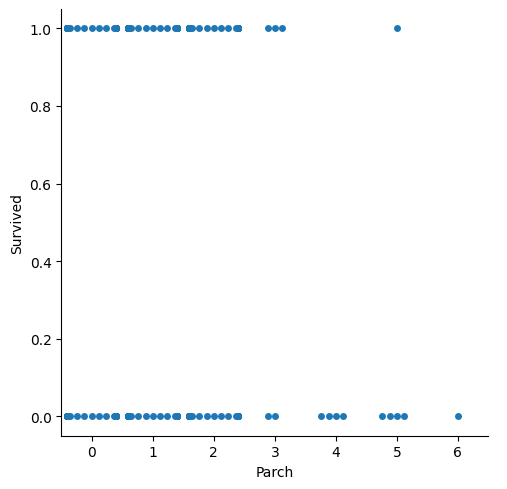

In [ ]:
#siblings and survival
#The more siblings reduces survival chance
#Fewer survival with more siblings and parents
sns.catplot(data=data_frame, x="Parch", y="Survived", kind="swarm")
plt.show()

In [4]:
#encoding cat-fields
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# onehotencoder = OneHotEncoder(sparse_output=True)
# label = LabelEncoder()
# data_frame["Gender"] = label.fit_transform(data_frame['Sex'])
# data_frame["Station"] = label.fit_transform(data_frame["Embarked"])

# #df_train = data_frame.drop(axis=1, columns=["Sex", "Embarked"])
# df_test = data_frame.drop(axis=1, columns=["Sex", "Embarked"])
# df_train.sample(20)


In [5]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

path = "/content/train.csv"

def load_data(file_path):
  data_frame = pd.read_csv(file_path)
  data_frame = data_frame.drop(axis=1, columns=["Cabin", "Ticket", "PassengerId", "Name"])

  mean_value = data_frame["Age"].mean()
  mean_value

  data_frame["Age"].fillna(value=mean_value, inplace=True)
  data_frame.dropna(axis=0, inplace=True)

  label = LabelEncoder()
  data_frame["Gender"] = label.fit_transform(data_frame['Sex'])
  data_frame["Station"] = label.fit_transform(data_frame["Embarked"])

  data_frame = data_frame.drop(axis=1, columns=["Sex", "Embarked"])

  return data_frame

df_train = load_data(path)
df_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Gender,Station
0,0,3,22.0,1,0,7.2500,1,2
1,1,1,38.0,1,0,71.2833,0,0
2,1,3,26.0,0,0,7.9250,0,2
3,1,1,35.0,1,0,53.1000,0,2
4,0,3,35.0,0,0,8.0500,1,2


In [72]:
path = "/content/test.csv"

def load_data(file_path):
  data_frame = pd.read_csv(file_path)
  data_frame = data_frame.drop(axis=1, columns=["Cabin", "Ticket", "PassengerId", "Name"])

  mean_value = data_frame["Age"].mean()
  mean_value

  data_frame["Age"].fillna(value=mean_value, inplace=True)
  data_frame.dropna(axis=0, inplace=True)

  label = LabelEncoder()
  data_frame["Gender"] = label.fit_transform(data_frame['Sex'])
  data_frame["Station"] = label.fit_transform(data_frame["Embarked"])

  data_frame = data_frame.drop(axis=1, columns=["Sex", "Embarked"])

  return data_frame

validate_result = load_data(path)
validate_result.head()

,Pclass,Age,SibSp,Parch,Fare,Gender,Station
0,3,34.5,0,0,7.8292,1,1
1,3,47.0,1,0,7.0000,0,2
2,2,62.0,0,0,9.6875,1,1
3,3,27.0,0,0,8.6625,1,2
4,3,22.0,1,1,12.2875,0,2


In [6]:
from sklearn.model_selection import train_test_split

X = df_train.drop("Survived", axis=1)
y = df_train["Survived"]


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [7]:
#modelling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


model = LogisticRegression(max_iter=400)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


0.7921348314606742
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       113
           1       0.72      0.71      0.71        65

    accuracy                           0.79       178
   macro avg       0.78      0.77      0.78       178
weighted avg       0.79      0.79      0.79       178



In [9]:
random = RandomForestClassifier(random_state=42)
random.fit(x_train, y_train)

y_pred = random.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8146067415730337
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       113
           1       0.74      0.75      0.75        65

    accuracy                           0.81       178
   macro avg       0.80      0.80      0.80       178
weighted avg       0.82      0.81      0.81       178



In [10]:
svc = SVC(kernel="linear")
svc.fit(x_train, y_train)

y_pred = svc.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8033707865168539
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       113
           1       0.74      0.71      0.72        65

    accuracy                           0.80       178
   macro avg       0.79      0.78      0.79       178
weighted avg       0.80      0.80      0.80       178



In [12]:
neighbor = KNeighborsClassifier(n_neighbors=8)
neighbor.fit(x_train, y_train)

y_pred = neighbor.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7584269662921348
              precision    recall  f1-score   support

           0       0.77      0.89      0.82       113
           1       0.74      0.52      0.61        65

    accuracy                           0.76       178
   macro avg       0.75      0.71      0.72       178
weighted avg       0.76      0.76      0.75       178



In [62]:
# boostAda = AdaBoostClassifier(random_state=42, learning_rate=0.1, n_estimators=30)
# boostAda.fit(x_train, y_train)

# y_pred = boostAda.predict(x_test)

# print(accuracy_score(y_test, y_pred))
# print(classification_report(y_test, y_pred))

def testAdaBoosting(random_state, learning, n_estimators, data):
  model = GradientBoostingClassifier(random_state=random_state, learning_rate=learning, n_estimators=n_estimators, init=KNeighborsClassifier(n_neighbors=5))
  model.fit(data[0], data[1])
  y_pred = model.predict(data[2])

  print(accuracy_score(data[3], y_pred))
  print(classification_report(data[3], y_pred))

#1, 300 = 85
#0.1, 200 = 85

import random
learning = [1, 0.1, 0.01, 0.25, 0.2, 0.5, 0.05, 1.2]
n_estimators = [100, 50, 200, 150 ,190, 300]

rate = random.choice(learning)
est = random.choice(n_estimators)
print(rate)
print(est)

data = [x_train, y_train, x_test, y_test]

testAdaBoosting(42, 0.1, 200, data)


0.1
150
0.8539325842696629
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       113
           1       0.80      0.80      0.80        65

    accuracy                           0.85       178
   macro avg       0.84      0.84      0.84       178
weighted avg       0.85      0.85      0.85       178



In [ ]:
boosting = GradientBoostingClassifier(random_state=42, learning_rate=0.25)
boosting.fit(x_train, y_train)

y_pred = boosting.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.848314606741573
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       106
           1       0.87      0.74      0.80        72

    accuracy                           0.85       178
   macro avg       0.85      0.83      0.84       178
weighted avg       0.85      0.85      0.85       178



In [ ]:
from typing import ParamSpecArgs
#fine-tuning the logisticRegresion and GradientBoosting
from sklearn.model_selection import GridSearchCV

params = {
    "loss": ["log_loss", "exponential"],
    "learning_rate": [0.2,0.1,1],
    "n_estimators": [100,200,150],
    "subsample": [0.5, 1],
    "criterion": ['friedman_mse', "squared_error"],
    "max_features": ["sqrt", "log2", None],
    "init": [RandomForestClassifier(random_state=42), LogisticRegression(max_iter=500), GradientBoostingClassifier(random_state=42), KNeighborsClassifier(n_neighbors=5), SVC(kernel="linear", random_state=42)]
}
search = GridSearchCV(boosting, params, scoring="accuracy", refit=True)

search.fit(x_train, y_train)


search.best_estimator_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
1080 fits failed out of a total of 5400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1080 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py", line 420, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/uti

GradientBoostingClassifier(init=GradientBoostingClassifier(random_state=42),
                           max_features='sqrt', random_state=42, subsample=0.5)

In [68]:
# boosting = GradientBoostingClassifier(random_state=42 , learning_rate=0.25)

boosting = GradientBoostingClassifier(learning_rate=0.1, random_state=42, n_estimators=200)
boosting.fit(x_train, y_train)

y_pred = boosting.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8539325842696629
              precision    recall  f1-score   support

           0       0.88      0.89      0.89       113
           1       0.81      0.78      0.80        65

    accuracy                           0.85       178
   macro avg       0.84      0.84      0.84       178
weighted avg       0.85      0.85      0.85       178



In [92]:
new_pred = boosting.predict(validate_result)
new_pred = np.append(new_pred, 0)

418


418

In [95]:
output = pd.DataFrame({"PassengerId": df.PassengerId, "Survived": new_pred})
output.to_csv("submission.csv", index=False)

<Axes: >

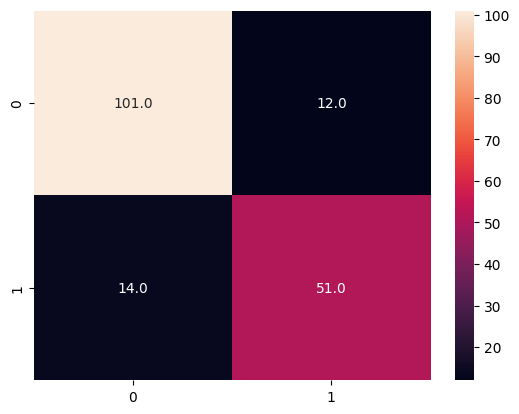

In [70]:
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True, fmt=".1f")